In [1]:
!git clone https://github.com/divya-r-kamat/smolLM2-135M-from-stratch.git

Cloning into 'smolLM2-135M-from-stratch'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 45 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 251.06 KiB | 840.00 KiB/s, done.
Resolving deltas: 100% (21/21), done.


In [2]:
%cd /content/smolLM2-135M-from-stratch

/content/smolLM2-135M-from-stratch


In [3]:
from model import SmolLM2, SmolLM2Config
import torch

device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = "mps"
print(f"using device: {device}")

using device: cuda


## Load the model, with ligther config and run it for small batch size

In [4]:
if __name__ == "__main__":
    # Create a small model for testing
    config = SmolLM2Config(
        vocab_size=1000,
        n_layer=4,
        n_head=4,
        n_kv_head=2,
        n_embd=128,
        block_size=256,
    )

    model = SmolLM2(config)
    print(model)

    # Create dummy input (batch_size=2, seq_len=10)
    dummy_input = torch.randint(0, config.vocab_size, (2, 10))

    # Forward pass
    logits, loss = model(dummy_input, targets=dummy_input)

    print(f"Model created with {sum(p.numel() for p in model.parameters())} parameters")
    print(f"Input shape: {dummy_input.shape}")
    print(f"Output shape: {logits.shape}")

SmolLM2(
  (model): ModuleDict(
    (embed_tokens): Embedding(1000, 128)
    (layers): ModuleList(
      (0-3): 4 x Block(
        (input_layernorm): RMSNorm()
        (self_attn): GroupedQueryAttention(
          (q_proj): Linear(in_features=128, out_features=256, bias=False)
          (k_proj): Linear(in_features=128, out_features=128, bias=False)
          (v_proj): Linear(in_features=128, out_features=128, bias=False)
          (o_proj): Linear(in_features=256, out_features=128, bias=False)
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (rope): RotaryPositionalEmbedding()
        )
        (post_attention_layernorm): RMSNorm()
        (mlp): SwiGLU(
          (gate_proj): Linear(in_features=128, out_features=1536, bias=False)
          (up_proj): Linear(in_features=128, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=128, bias=False)
        )
      )
    )
    (norm): RMSNorm()
  )
)
Model created with 2881664 paramete

## Load Pretrained model

In [5]:
import torch
if __name__ == "__main__":
    print(f"using device: {device}")

    # model = SmolLM2(config)
    model = SmolLM2.from_pretrained('HuggingFaceTB/SmolLM2-135M')
    print(model)

using device: cuda
Loading weights from pretrained model: HuggingFaceTB/SmolLM2-135M


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Model loaded successfully!
SmolLM2(
  (model): ModuleDict(
    (embed_tokens): Embedding(49152, 576)
    (layers): ModuleList(
      (0-29): 30 x Block(
        (input_layernorm): RMSNorm()
        (self_attn): GroupedQueryAttention(
          (q_proj): Linear(in_features=576, out_features=576, bias=False)
          (k_proj): Linear(in_features=576, out_features=192, bias=False)
          (v_proj): Linear(in_features=576, out_features=192, bias=False)
          (o_proj): Linear(in_features=576, out_features=576, bias=False)
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (rope): RotaryPositionalEmbedding()
        )
        (post_attention_layernorm): RMSNorm()
        (mlp): SwiGLU(
          (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
          (up_proj): Linear(in_features=576, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=576, bias=False)
        )
      )
    )
    (norm): RMSNorm()
  )
)


# Train SmolLM2-135M parameters from stratch

In [6]:
!python train.py --steps 5000

Using device: cuda
tokenizer_config.json: 3.66kB [00:00, 2.42MB/s]
vocab.json: 801kB [00:00, 11.5MB/s]
merges.txt: 466kB [00:00, 49.8MB/s]
tokenizer.json: 2.10MB [00:00, 71.2MB/s]
special_tokens_map.json: 100% 831/831 [00:00<00:00, 7.83MB/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (341094 > 8192). Running this sequence through the model will result in indexing errors
Loaded 341094 tokens
~333 batches per full pass

Training from step 0 → 5000
LR schedule: enabled (max=0.0003, min=2.9999999999999997e-05)
Using max_steps=5000 for LR calculation

step 0 | loss 10.9773 | lr 0.000003 | tok/s    750.4
step 100 | loss 6.4851 | lr 0.000300 | tok/s   2254.1
step 200 | loss 5.4612 | lr 0.000300 | tok/s   2125.8
step 300 | loss 5.0673 | lr 0.000299 | tok/s   2197.1
step 400 | loss 4.9364 | lr 0.000298 | tok/s   2192.0
step 500 | loss 5.1199 | lr 0.000296 | tok/s   2184.1
step 600 | loss 5.0958 | lr 0.000293 | tok/s   2187.4
step 700 | loss

In [7]:
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()

In [8]:
!python train.py --steps 5050 --ckpt checkpoint.pt --save checkpoint_5050.pt --log-interval 5


Using device: cuda
Token indices sequence length is longer than the specified maximum sequence length for this model (341094 > 8192). Running this sequence through the model will result in indexing errors
Loaded 341094 tokens
~333 batches per full pass
Optimizer state entries: 272

Checkpoint loaded from checkpoint.pt
Resuming from step 5000 | loss 2.0870
Original LR schedule: max_steps=5000
Continuing with original LR schedule (original max_steps: 5000)

Training from step 5000 → 5050
LR schedule: enabled (max=0.0003, min=2.9999999999999997e-05)
Using max_steps=5000 for LR calculation

step 5000 | loss 1.9662 | lr 0.000030 | tok/s    301.9

Saved checkpoint: checkpoint_step_5000.pt
step 5005 | loss 1.7517 | lr 0.000030 | tok/s   2142.9
step 5010 | loss 1.6168 | lr 0.000030 | tok/s   2150.3
step 5015 | loss 1.7878 | lr 0.000030 | tok/s   2114.4
step 5020 | loss 1.3299 | lr 0.000030 | tok/s   2104.3
step 5025 | loss 1.3462 | lr 0.000030 | tok/s   2079.6
step 5030 | loss 1.2582 | lr 0.00

In [9]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import torch
checkpoint = torch.load('/content/smolLM2-135M-from-stratch/checkpoint_5050.pt', map_location='cpu', weights_only=False)

torch.save({
    'model_state': checkpoint['model_state'],
    'config': checkpoint['config'],
    'loss': checkpoint['loss'],
    'step': checkpoint['step'],
}, '/content/smolLM2-135M-from-stratch/smollm2_model_only.pt')

from huggingface_hub import upload_file
upload_file(
    path_or_fileobj="/content/smolLM2-135M-from-stratch/smollm2_model_only.pt",
    path_in_repo="smol_model.pt",
    repo_id="dkamat/smolLM2-135M-from-stratch",
    repo_type="space",
    commit_message="new trained model smol_model.pt"
)

SmolLM2 Model Analysis

Model Configuration:
  Vocabulary Size: 49,152
  Embedding Dimensions: 576
  Hidden Layers: 30
  Attention Heads: 9
  Key-Value Heads: 3
  Head Dimension: 64
  Intermediate Size: 1536


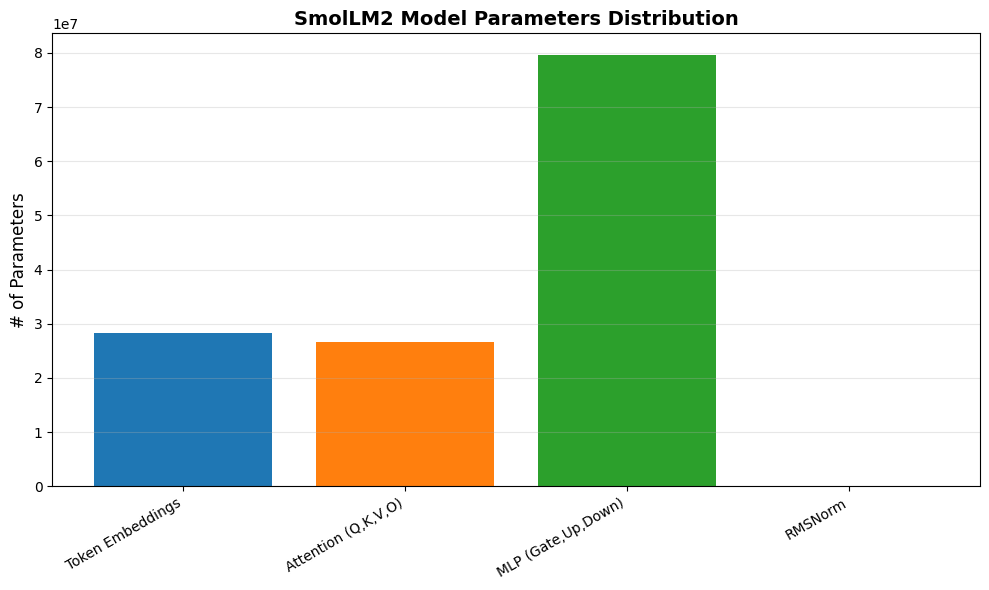


Parameter Breakdown
Token Embeddings                    28,311,552      21.05%
Attention Q                          9,953,280       7.40%
Attention K                          3,317,760       2.47%
Attention V                          3,317,760       2.47%
Attention O                          9,953,280       7.40%
MLP Gate                            26,542,080      19.73%
MLP Up                              26,542,080      19.73%
MLP Down                            26,542,080      19.73%
RMSNorm                                 35,136       0.03%
Output (shared)                              0       0.00%

Total Parameters                   134,515,008
Total (Millions)                        134.52M


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ============================================================================
# SmolLM2 Model Configuration
# ============================================================================

vocabulary_size = 49152
embedding_dimensions = 576  # n_embd
num_attention_heads = 9
num_kv_heads = 3  # Grouped Query Attention
num_hidden_layers = 30  # Using reduced layers for our training
feed_forward_ratio = 1536 / 576  # intermediate_size / n_embd ≈ 2.67
head_dim = 64

print("=" * 80)
print("SmolLM2 Model Analysis")
print("=" * 80)
print(f"\nModel Configuration:")
print(f"  Vocabulary Size: {vocabulary_size:,}")
print(f"  Embedding Dimensions: {embedding_dimensions}")
print(f"  Hidden Layers: {num_hidden_layers}")
print(f"  Attention Heads: {num_attention_heads}")
print(f"  Key-Value Heads: {num_kv_heads}")
print(f"  Head Dimension: {head_dim}")
print(f"  Intermediate Size: {int(embedding_dimensions * feed_forward_ratio)}")

# ============================================================================
# Parameter Count Breakdown
# ============================================================================

parameter_counts = {
    "Token Embeddings": vocabulary_size * embedding_dimensions,

    # Grouped Query Attention: Q has n_head * head_dim, K/V have n_kv_head * head_dim
    "Attention Q": (embedding_dimensions * num_attention_heads * head_dim) * num_hidden_layers,
    "Attention K": (embedding_dimensions * num_kv_heads * head_dim) * num_hidden_layers,
    "Attention V": (embedding_dimensions * num_kv_heads * head_dim) * num_hidden_layers,
    "Attention O": (num_attention_heads * head_dim * embedding_dimensions) * num_hidden_layers,

    # SwiGLU MLP: gate_proj, up_proj, down_proj (no biases)
    "MLP Gate": (embedding_dimensions * int(embedding_dimensions * feed_forward_ratio)) * num_hidden_layers,
    "MLP Up": (embedding_dimensions * int(embedding_dimensions * feed_forward_ratio)) * num_hidden_layers,
    "MLP Down": (int(embedding_dimensions * feed_forward_ratio) * embedding_dimensions) * num_hidden_layers,

    # RMSNorm: only weight parameters (no bias)
    "RMSNorm": embedding_dimensions * (2 * num_hidden_layers + 1),  # input_norm + post_attn_norm per layer + final norm

    "Output (shared)": 0,  # Tied with embeddings
}

# Combine attention for visualization
attention_params = (
    parameter_counts["Attention Q"] +
    parameter_counts["Attention K"] +
    parameter_counts["Attention V"] +
    parameter_counts["Attention O"]
)

mlp_params = (
    parameter_counts["MLP Gate"] +
    parameter_counts["MLP Up"] +
    parameter_counts["MLP Down"]
)

viz_params = {
    "Token Embeddings": parameter_counts["Token Embeddings"],
    "Attention (Q,K,V,O)": attention_params,
    "MLP (Gate,Up,Down)": mlp_params,
    "RMSNorm": parameter_counts["RMSNorm"],
}

# Plot
plt.figure(figsize=(10, 6))
plt.bar(viz_params.keys(), viz_params.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("SmolLM2 Model Parameters Distribution", fontsize=14, fontweight='bold')
plt.ylabel("# of Parameters", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

# Detailed breakdown
print("\n" + "=" * 80)
print("Parameter Breakdown")
print("=" * 80)

total_parameter_count = sum(parameter_counts.values())

for name, count in parameter_counts.items():
    print(f"{name:25s} {count:20,d} {count / total_parameter_count * 100:10.2f}%")

print(f"\n{'Total Parameters':25s} {total_parameter_count:20,d}")
print(f"{'Total (Millions)':25s} {total_parameter_count/1e6:20.2f}M")

In [2]:
aspect_ratio = embedding_dimensions / num_hidden_layers

print(f"Network has an aspect ratio of {aspect_ratio:.2f}")

Network has an aspect ratio of 19.20


In [3]:
heads_ratio = embedding_dimensions / num_attention_heads

print(f"Heads ratio is {heads_ratio:.2f}")

Heads ratio is 64.00


In [4]:
# ============================================================================
# Memory Requirements
# ============================================================================

print("\n" + "=" * 80)
print("Memory Requirements")
print("=" * 80)

# Model weights
bytes_per_param_fp32 = 4
bytes_per_param_fp16 = 2
bytes_per_param_bf16 = 2

model_memory_fp32 = total_parameter_count * bytes_per_param_fp32 / (1024**3)
model_memory_fp16 = total_parameter_count * bytes_per_param_fp16 / (1024**3)
model_memory_bf16 = total_parameter_count * bytes_per_param_bf16 / (1024**3)

print(f"\nModel Weights:")
print(f"  FP32:    {model_memory_fp32:.2f} GB")
print(f"  FP16:    {model_memory_fp16:.2f} GB")
print(f"  BF16:    {model_memory_bf16:.2f} GB")

# Training memory (optimizer states, gradients, activations)
# AdamW: 2 states per parameter (momentum and variance)
optimizer_memory_fp32 = total_parameter_count * 8 / (1024**3)  # 2 states * 4 bytes
gradient_memory_fp32 = total_parameter_count * 4 / (1024**3)

print(f"\nTraining Memory (FP32 optimizer):")
print(f"  Model (FP16/BF16):  {model_memory_fp16:.2f} GB")
print(f"  Gradients (FP32):   {gradient_memory_fp32:.2f} GB")
print(f"  Optimizer States:   {optimizer_memory_fp32:.2f} GB")

# Activation memory (depends on batch size and sequence length)
batch_size = 4
sequence_length = 256

# Rough estimate: ~34 * layers * hidden_size * batch * seq_len bytes
activation_memory_estimate = (34 * num_hidden_layers * embedding_dimensions *
                              batch_size * sequence_length) / (1024**3)

print(f"  Activations (B={batch_size}, T={sequence_length}): ~{activation_memory_estimate:.2f} GB")

total_training_memory = (model_memory_fp16 + gradient_memory_fp32 +
                         optimizer_memory_fp32 + activation_memory_estimate)

print(f"\n  Total Training Memory: ~{total_training_memory:.2f} GB")


Memory Requirements

Model Weights:
  FP32:    0.50 GB
  FP16:    0.25 GB
  BF16:    0.25 GB

Training Memory (FP32 optimizer):
  Model (FP16/BF16):  0.25 GB
  Gradients (FP32):   0.50 GB
  Optimizer States:   1.00 GB
  Activations (B=4, T=256): ~0.56 GB

  Total Training Memory: ~2.31 GB


# Chinchilla Scaling Laws

In [5]:
print("\n" + "=" * 80)
print("Chinchilla Scaling Laws")
print("=" * 80)

"""
Chinchilla optimal scaling:
- For compute budget C, optimal parameters N and tokens D satisfy:
  N_opt ≈ (C / 6)^0.5 / k_N
  D_opt ≈ (C / 6)^0.5 / k_D

- Simplified: D_opt ≈ 20 * N (20 tokens per parameter)
- Conservative: D_opt ≈ 10-30 * N
"""

# Chinchilla recommendation: ~20 tokens per parameter
chinchilla_tokens = 20 * total_parameter_count

print(f"\nModel Parameters: {total_parameter_count/1e6:.2f}M")
print(f"\nChinchilla Optimal Training Tokens:")
print(f"  Conservative (10x): {10 * total_parameter_count/1e9:.2f}B tokens")
print(f"  Standard (20x):     {20 * total_parameter_count/1e9:.2f}B tokens")
print(f"  Aggressive (30x):   {30 * total_parameter_count/1e9:.2f}B tokens")

# Compute budget for optimal training
compute_budget_flops = 6 * total_parameter_count * chinchilla_tokens

print(f"\nCompute Budget (Chinchilla optimal):")
print(f"  Total FLOPs: {compute_budget_flops/1e15:.2f} PFLOPs")
print(f"  With 5000 steps, tokens/step: {chinchilla_tokens/5000:,.0f}")

# Actual training estimate
training_steps = 5000
tokens_per_step = batch_size * sequence_length
total_training_tokens = training_steps * tokens_per_step

print(f"\nOur Training Configuration:")
print(f"  Steps: {training_steps:,}")
print(f"  Tokens per step: {tokens_per_step}")
print(f"  Total tokens: {total_training_tokens:,} ({total_training_tokens/1e6:.2f}M)")
print(f"  Ratio to Chinchilla optimal: {total_training_tokens/chinchilla_tokens:.4f}x")

if total_training_tokens < chinchilla_tokens:
    additional_tokens_needed = chinchilla_tokens - total_training_tokens
    additional_steps_needed = additional_tokens_needed / tokens_per_step
    print(f"\n  ⚠️  Under-trained by Chinchilla standards")
    print(f"  Additional tokens needed: {additional_tokens_needed/1e6:.2f}M")
    print(f"  Additional steps needed: {additional_steps_needed:,.0f}")
else:
    print(f"\n  ✅ Training budget meets Chinchilla recommendations")


Chinchilla Scaling Laws

Model Parameters: 134.52M

Chinchilla Optimal Training Tokens:
  Conservative (10x): 1.35B tokens
  Standard (20x):     2.69B tokens
  Aggressive (30x):   4.04B tokens

Compute Budget (Chinchilla optimal):
  Total FLOPs: 2171.31 PFLOPs
  With 5000 steps, tokens/step: 538,060

Our Training Configuration:
  Steps: 5,000
  Tokens per step: 1024
  Total tokens: 5,120,000 (5.12M)
  Ratio to Chinchilla optimal: 0.0019x

  ⚠️  Under-trained by Chinchilla standards
  Additional tokens needed: 2685.18M
  Additional steps needed: 2,622,246


## Estimate the number of FLOPs using the method in the PaLM paper by Chowdhery, et al.

FLOPs = 6NT + 12LHdT²

Where:

6NT: Linear operations (embeddings, projections, MLP)
12LHdT²: Quadratic attention operations

In [10]:
total_parameter_count = 135000000  # 135M parameters
num_hidden_layers = 30
num_attention_heads = 9  # query heads
head_dimensions = 64
tokens_per_sample = 256  # T


term1 = 6 * total_parameter_count
term2 = 12 * num_hidden_layers * num_attention_heads * head_dimensions * tokens_per_sample
palm_flops_per_token = term1 + term2
total_palm_flops = palm_flops_per_token * tokens_per_sample
print("Total Flops",total_palm_flops)

Total Flops 220949544960
